## Setting up the environment

We start by setting up the environment. Here is were we are going to add all the needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Make sure to mount Google Drive if your data comes from that location

In [2]:
FILE_PATH = "TitanicData.csv"

## Loading the Data

In [4]:
titanic_data = pd.read_csv(FILE_PATH)
titanic_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## EDA: Exploratory Data Analysis


> Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

https://www.ibm.com/topics/exploratory-data-analysis

**Why EDA for AI and ML?**

> Exploratory data analysis helps ensure your machine learning implementations are reliable, robust, and can bring insights before you engineer the pipeline and push to production.


https://www.bitstrapped.com/blog/exploratory-data-analysis-accelerates-machine-learning#:~:text=Exploratory%20data%20analysis%20helps%20ensure,pipeline%20and%20push%20to%20production.

In [12]:
# get the summary of the dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


The describe() function in pandas is crucial for a few reasons. It provides a quick summary of the central tendency, dispersion, and shape of the dataset’s distribution, excluding NaN values.

In [13]:
# display the summary statistic for numerical columns
titanic_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
# Display summary statistics for categorical columns
titanic_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [15]:
# check for missing values
titanic_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


### Data Filtering

Data filtering is important because it allows analysts to focus on specific subsets of data that are relevant to their analysis or research questions. By isolating particular groups or conditions within a dataset, filtering helps to remove noise and irrelevant information, making it easier to identify patterns, trends, and insights. This targeted approach not only enhances the clarity and accuracy of the analysis but also improves the efficiency of data processing and interpretation, ultimately leading to more informed decision-making.

In [16]:
# Which passengers in the Titanic dataset were in first class and over the age of 50?

query = (titanic_data['Pclass'] == 1) & (titanic_data['Age'] > 50)
first_class_over_50 = titanic_data[query]
first_class_over_50

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
20,912,1,"Rothschild, Mr. Martin",male,55.0,1,0,PC 17603,59.4000,NaN,C
48,940,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C
69,961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
77,969,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.7000,C101,S
81,973,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
114,1006,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,PC 17483,221.7792,C55 C57,S
131,1023,1,"Gracie, Col. Archibald IV",male,53.0,0,0,113780,28.5000,C51,C
142,1034,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
177,1069,1,"Stengel, Mr. Charles Emil Henry",male,54.0,1,0,11778,55.4417,C116,C


In [17]:
# Which passengers were female and under 18 years old?

query = (titanic_data['Sex'] == 'female') & (titanic_data['Age'] < 18)
female_under_18 = titanic_data[query]
female_under_18

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
104,996,3,"Thomas, Mrs. Alexander (Thamine Thelma"")""",female,16.00,1,1,2625,8.5167,NaN,C
117,1009,3,"Sandstrom, Miss. Beatrice Irene",female,1.00,1,1,PP 9549,16.7000,G6,S
120,1012,2,"Watt, Miss. Bertha J",female,12.00,0,0,C.A. 33595,15.7500,NaN,S
125,1017,3,"Cribb, Miss. Laura Alice",female,17.00,0,1,371362,16.1000,NaN,S
140,1032,3,"Goodwin, Miss. Jessie Allis",female,10.00,5,2,CA 2144,46.9000,NaN,S
175,1067,2,"Brown, Miss. Edith Eileen",female,15.00,0,2,29750,39.0000,NaN,S
203,1095,2,"Quick, Miss. Winifred Vera",female,8.00,1,1,26360,26.0000,NaN,S
250,1142,2,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.7500,NaN,S
263,1155,3,"Klasen, Miss. Gertrud Emilia",female,1.00,1,1,350405,12.1833,NaN,S
283,1175,3,"Touma, Miss. Maria Youssef",female,9.00,1,1,2650,15.2458,NaN,C


In [18]:
# Which passengers embarked at 'C' and paid more than 50 for their fare?

query = (titanic_data['Embarked'] == 'C') & (titanic_data['Fare'] > 50)
embarked_c_over_50 = titanic_data[query]
embarked_c_over_50

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
20,912,1,"Rothschild, Mr. Martin",male,55.0,1,0,PC 17603,59.4000,NaN,C
23,915,1,"Williams, Mr. Richard Norris II",male,21.0,0,1,PC 17597,61.3792,NaN,C
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
34,926,1,"Mock, Mr. Philipp Edmund",male,30.0,1,0,13236,57.7500,C78,C
48,940,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C
59,951,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C
64,956,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
74,966,1,"Geiger, Miss. Amalie",female,35.0,0,0,113503,211.5000,C130,C
75,967,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5000,C132,C


In [19]:
# Which passengers were between 30 and 40 years old and had no parents/children aboard?

query = (titanic_data['Age'] >= 30) & (titanic_data['Age'] <= 40) & (titanic_data['Parch'] == 0)
age_30_40_no_parch = titanic_data[query]
age_30_40_no_parch

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
16,908,2,"Keane, Mr. Daniel",male,35.0,0,0,233734,12.3500,NaN,Q
34,926,1,"Mock, Mr. Philipp Edmund",male,30.0,1,0,13236,57.7500,C78,C
43,935,2,"Corbett, Mrs. Walter H (Irene Colvin)",female,30.0,0,0,237249,13.0000,NaN,S
56,948,3,"Cor, Mr. Bartol",male,35.0,0,0,349230,7.8958,NaN,S
59,951,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C
61,953,2,"McCrae, Mr. Arthur Gordon",male,32.0,0,0,237216,13.5000,NaN,S
68,960,1,"Tucker, Mr. Gilbert Milligan Jr",male,31.0,0,0,2543,28.5375,C53,C
74,966,1,"Geiger, Miss. Amalie",female,35.0,0,0,113503,211.5000,C130,C


#### Question 1 (20 points)

In [22]:
# Which passengers were male and paid less than 10 for their fare? Create a text cell and explain your answer.

query = (titanic_data['Sex'] == 'male')& (titanic_data['Fare'] < 10)
male_fare_less_than_10 = titanic_data[query]
male_fare_less_than_10

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
398,1290,3,"Larsson-Rondberg, Mr. Edvard A",male,22.0,0,0,347065,7.7750,NaN,S
399,1291,3,"Conlon, Mr. Thomas Henry",male,31.0,0,0,21332,7.7333,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


113 men paid less than 10 for the fare.

### Aggregations

Aggregations are important because they simplify complex datasets by summarizing detailed data into meaningful metrics. By performing operations such as sum, mean, count, and max, aggregations condense large volumes of data into concise, interpretable forms that highlight key trends and patterns. This process aids in data analysis by enabling a clearer understanding of overall behaviors, comparisons across groups, and identifying significant insights quickly. Aggregations thus facilitate better decision-making and strategic planning, making them a crucial tool in data analysis and business intelligence.


In [ ]:
# What is the average age of passengers by passenger class?

average_age_by_class = titanic_data.groupby('Pclass')['Age'].mean()
average_age_by_class

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [ ]:
# What is the total fare collected for each embarkation point?

average_age_by_class = titanic_data.groupby('Embarked')['Fare'].sum()
average_age_by_class

Embarked
C    6758.4960
Q     504.0542
S    7593.9874
Name: Fare, dtype: float64

In [ ]:
# How many passengers were in each passenger class?

passenger_count_by_class = titanic_data.groupby('Pclass')['PassengerId'].count()
passenger_count_by_class

Pclass
1    107
2     93
3    218
Name: PassengerId, dtype: int64

#### Question 2 (20 points)

In [23]:
# What is the average fare paid by male and female passengers?

median_fare_by_sex = titanic_data.groupby('Sex')['Fare'].median()
median_fare_by_sex

,Fare
Sex,
female,21.5125
male,13.0000


### Data Visualization with matplotlib

Data visualization is essential because it transforms complex data into a visual context, making it easier to understand, interpret, and communicate insights. Visualizations such as charts, graphs, and maps allow patterns, trends, and correlations within the data to be identified more quickly than through raw data alone. This not only aids in the comprehension of the data but also helps in discovering hidden insights, making informed decisions, and conveying findings to others effectively. Moreover, visualizations can highlight outliers and anomalies, providing a clear overview of the dataset's overall structure and key areas that may require further investigation. In essence, data visualization is a powerful tool that enhances data analysis and storytelling, making information accessible and actionable.

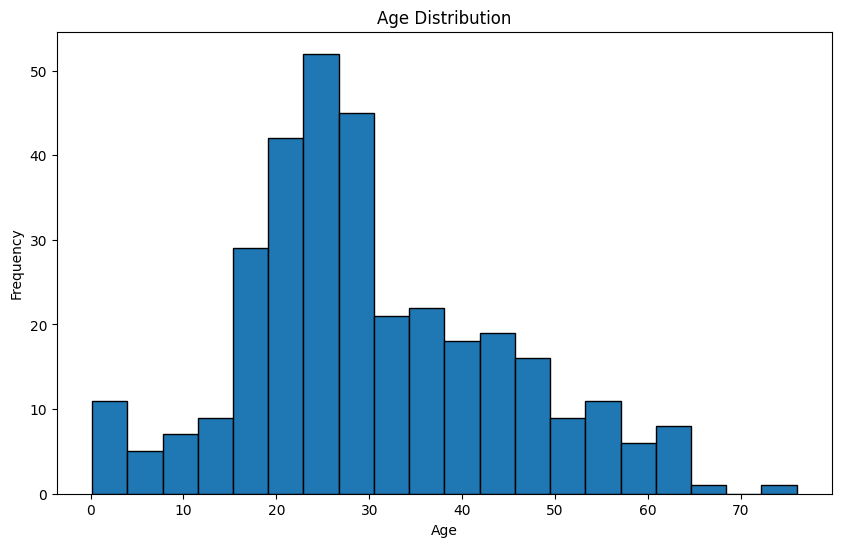

In [ ]:
# Plot the age distribution

plt.figure(figsize=(10, 6))
plt.hist(titanic_data['Age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

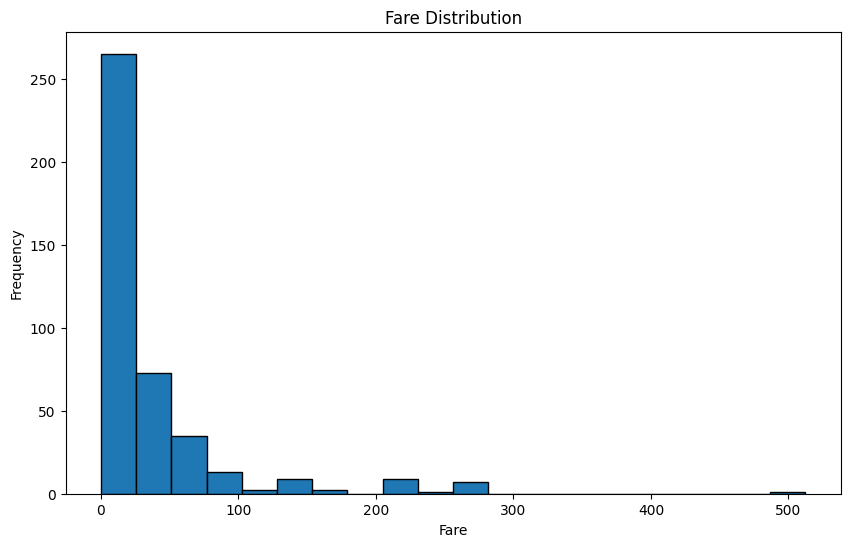

In [ ]:
# Plot the fare distribution
plt.figure(figsize=(10, 6))
plt.hist(titanic_data['Fare'], bins=20, edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')

plt.ylabel('Frequency')
plt.show()

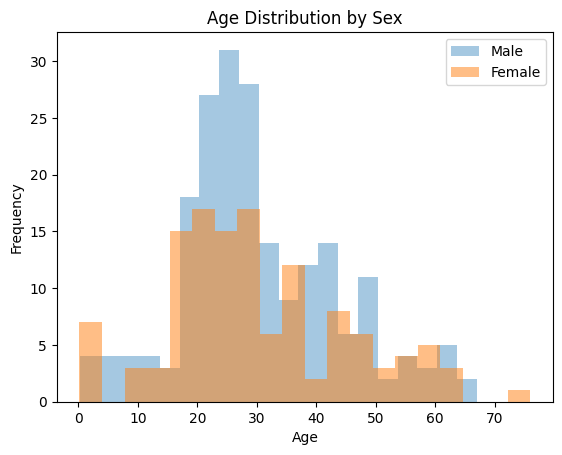

In [ ]:
# Plot the age distribution by sex

male_age = titanic_data[titanic_data['Sex'] == 'male']['Age']
female_age = titanic_data[titanic_data['Sex'] == 'female']['Age']
plt.hist(male_age, bins=20, alpha=0.4, label='Male')
plt.hist(female_age, bins=20, alpha=0.5, label='Female')
plt.title('Age Distribution by Sex')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Data Visualization with Seaborn

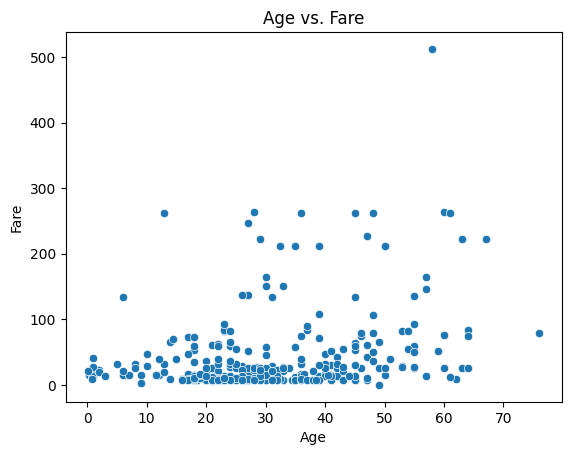

In [ ]:
sns.scatterplot(x='Age', y='Fare', data=titanic_data)
plt.title('Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

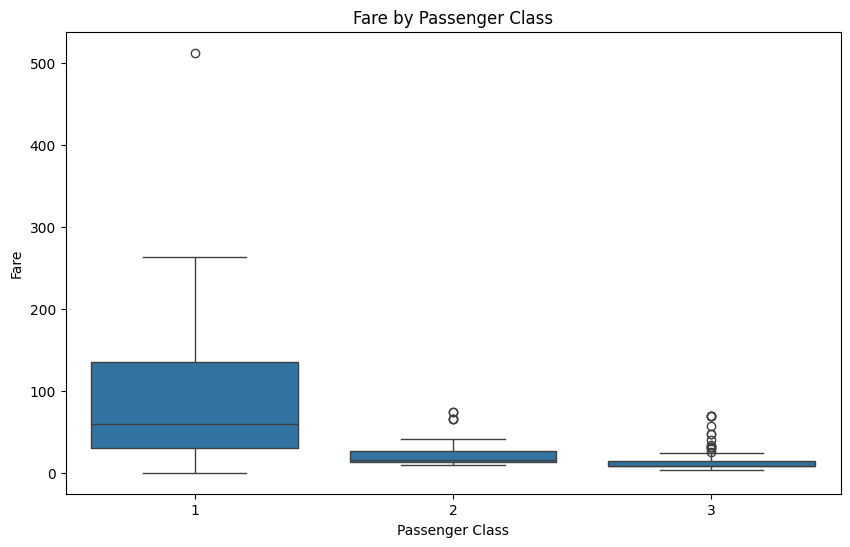

In [ ]:
# Boxplot of Fare by Passenger Class

sns.boxplot(x='Pclass', y='Fare', data=titanic_data)
plt.title('Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

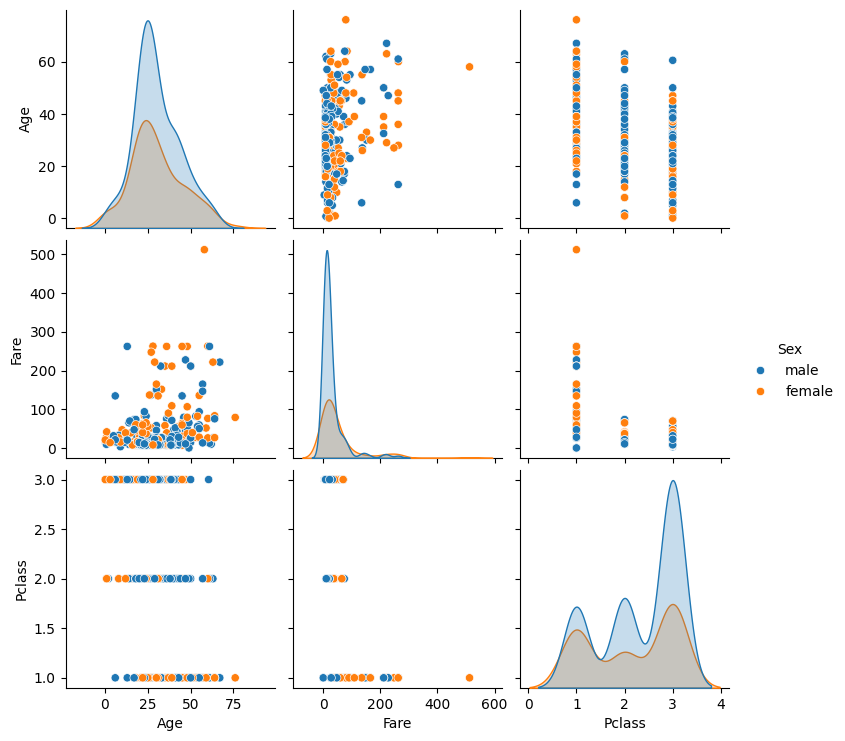

In [ ]:
# Pairplot of selected features

sns.pairplot(titanic_data, vars=['Age', 'Fare', 'Pclass'], hue='Sex')
plt.show()

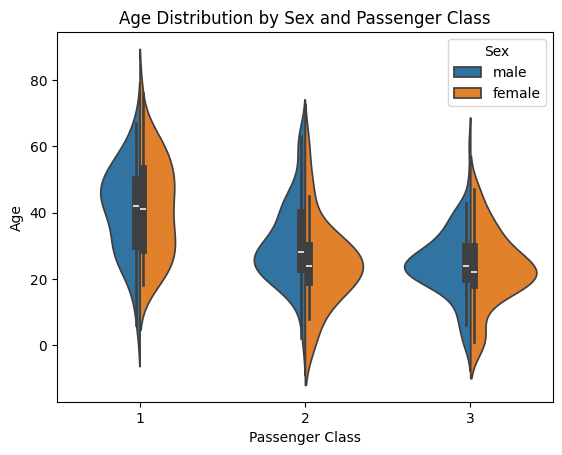

In [ ]:
# Violin plot of Age distribution by Sex and Passenger Class

sns.violinplot(x='Pclass', y='Age', hue='Sex', data=titanic_data, split=True)
plt.title('Age Distribution by Sex and Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

#### Question 3 (20 points)

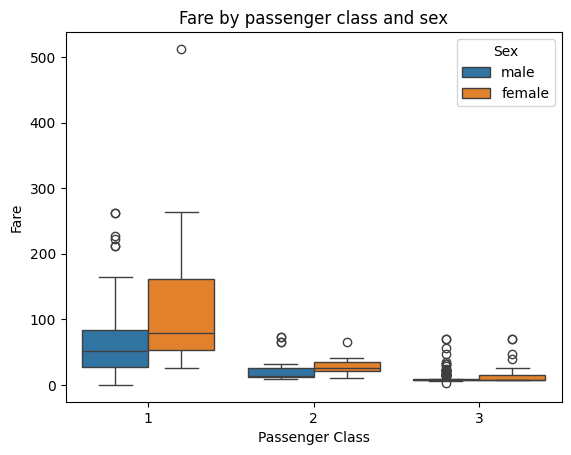

In [25]:
# Create a boxplot to visualize the Fare by passenger class and sex, and then explain which groups paid higher fares within each class.

sns.boxplot(x='Pclass', y='Fare', hue='Sex', data=titanic_data)
plt.title('Fare by passenger class and sex')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

#### Question 4 (40 points)

Formulate a question that you are curious to explore within the dataset and provide an answer using pandas, matplotlib, seaborn, or a combination of these tools.

Did passengers traveling alone pay less than those traveling with family?


Alone
False    26.00
True      8.05
Name: Fare, dtype: float64


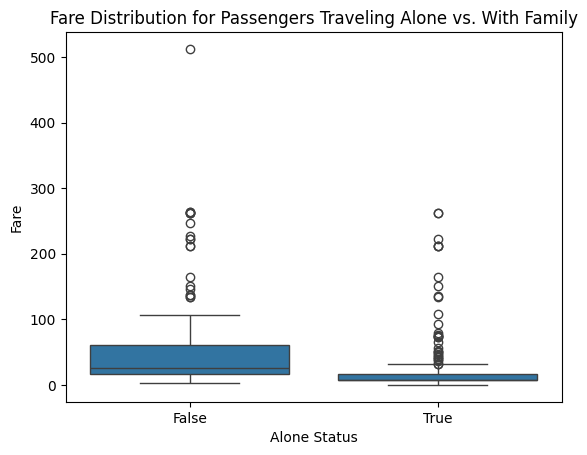

In [29]:
#Check to see if no siblings/parents/spouse and create Alone category
titanic_data['Alone'] = (titanic_data['SibSp'] == 0) & (titanic_data['Parch'] == 0)

# Compare median fares between those traveling alone vs. with family
fare_comparison = titanic_data.groupby('Alone')['Fare'].median()
print(fare_comparison)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot of Fare by Alone status
sns.boxplot(x=titanic_data['Alone'], y=titanic_data['Fare'])

# Add labels and title
plt.xlabel('Alone Status')
plt.ylabel('Fare')
plt.title('Fare Distribution for Passengers Traveling Alone vs. With Family')

# Show the plot
plt.show()


## Resources

https://pandas.pydata.org/docs/

https://matplotlib.org/stable/index.html

https://seaborn.pydata.org/

Would you like to make your plots interactive?

https://mode.com/blog/python-interactive-plot-libraries


### Books

[Mastering Pandas](https://www.packtpub.com/en-us/product/mastering-pandas-9781789343236?type=print&gad_source=1&gclid=CjwKCAjwgdayBhBQEiwAXhMxtlWdhLRO1F4ZbYAxAYLfOjW73o4Qayvz88MFVgwFdKEwaqXZJDG8cRoCvTYQAvD_BwE)

[Exploratory Data Analysis with Python Cookbook](https://www.packtpub.com/product/exploratory-data-analysis-with-python-cookbook/9781803231105)